In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

### Pre process, don't use!

In [4]:
avo = pd.read_csv("avocado.csv")
avo.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
avo.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [8]:
# avo[(avo.region == "California") & (avo.type == "conventional")]

In [9]:
cal = pd.DataFrame(avo[avo.region == "California"])

In [11]:
cal.drop(columns=['4046', "4225", '4770', 'Small Bags', 
                  'Large Bags', 'XLarge Bags', 'year', 'region'], inplace=True)
cal.head()

,Date,AveragePrice,Total Volume,Total Bags,type
312,2015-12-27,0.90,5040365.47,1212707.01,conventional
313,2015-12-20,0.94,4695737.21,1209165.20,conventional
314,2015-12-13,0.87,5259354.30,1592438.33,conventional
315,2015-12-06,0.78,5775536.27,1510267.34,conventional
316,2015-11-29,0.91,4575710.62,1081497.47,conventional


In [17]:
cal["Timestamp"] = avo.Date.apply(lambda x:
                                  int(datetime.datetime.strptime(x, '%Y-%m-%d').timestamp()))
cal = cal.sort_values(by=['Timestamp']).reset_index()

In [21]:
cal.drop(columns=['index'], inplace=True)

In [22]:
cal.head()

,Date,AveragePrice,Total Volume,Total Bags,type,Timestamp
0,2015-01-04,0.93,5777334.90,528451.74,conventional,1420347600
1,2015-01-04,1.24,142349.77,9144.15,organic,1420347600
2,2015-01-11,0.92,6024932.34,546047.53,conventional,1420952400
3,2015-01-11,1.10,158110.68,8421.43,organic,1420952400
4,2015-01-18,1.02,5570915.26,559990.93,conventional,1421557200


In [23]:
cal.to_csv("California.csv", index=False)

In [59]:
avo = pd.read_csv("avocado.csv")
avo.rename(columns={'Unnamed: 0':'week'}, inplace=True)
avo["Timestamp"] = avo.Date.apply(lambda x:
                                 int(datetime.datetime.strptime(x, '%Y-%m-%d').timestamp()))
avo = avo.sort_values(by=['region', 'Timestamp']).reset_index()

In [60]:
avo.columns

Index(['index', 'week', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region', 'Timestamp'],
      dtype='object')

In [5]:
avo.rename(columns={'avg$':'AvgPrice'}, inplace=True)

In [6]:
avo.drop(columns=['index', 'week'], inplace=True)
avo.to_csv("avocado.csv", index=False)

### Start process

In [7]:
avo = pd.read_csv("avocado.csv")
avo.head()

,Date,AvgPrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Timestamp
0,2015-02-01,0.99,70873.60,1353.90,60017.20,179.32,9323.18,9170.82,152.36,0.0,conventional,2015,Albany,1420088520
1,2015-02-01,1.83,1228.51,33.12,99.36,0.00,1096.03,1096.03,0.00,0.0,organic,2015,Albany,1420088520
2,2015-03-01,0.99,55595.74,629.46,45633.34,181.49,9151.45,8986.06,165.39,0.0,conventional,2015,Albany,1420088580
3,2015-03-01,1.76,1663.35,32.82,105.25,0.00,1525.28,1525.28,0.00,0.0,organic,2015,Albany,1420088580
4,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany,1420089060


In [66]:
avo.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

### Background information

Avocados are grown commercially in parts of **Florida, California and Hawaii**.

- https://www.hunker.com/12003820/in-what-areas-of-the-united-states-can-you-grow-an-avocado-tree

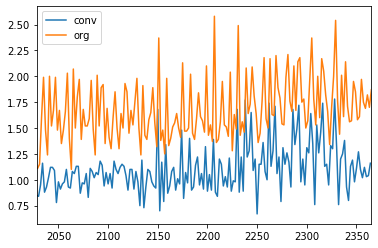

In [19]:
avo[(avo.region == 'California') & (avo.type == "conventional")].AvgPrice.plot.line(label="conv")
avo[(avo.region == 'California') & (avo.type == "organic")].AvgPrice.plot.line(label="org")
f = plt.legend()

In [48]:
p1 = pd.DataFrame(avo[avo.type == "organic"])
p2 = pd.DataFrame(avo[avo.type == "conventional"])

In [49]:
p1.rename(columns={'AvgPrice':'org'}, inplace=True)
p2.rename(columns={'AvgPrice':'conv'}, inplace=True)

In [55]:
_df = p1.merge(p2, on=["region", "Timestamp"])

In [65]:
_df.drop(columns=['Date_y', 'Small Bags_y', 'Large Bags_y', 'XLarge Bags_y', 
                  'Small Bags_x', 'Large Bags_x', 'XLarge Bags_x', '4046_x', 
                  '4225_x', '4770_x', '4046_y', '4225_y', '4770_y''type_x', 
                  'year_y', 'type_y'], inplace=True)

In [69]:
_df.rename(columns={'Total Volume_x':'TotalVolOrg', 
                    'Total Volume_y':'TotalVolConv', 
                    'Total Bags_x':'TotalBagsOrg', 
                    'Total Bags_y':'TotalBagsConv', 
                    'year_x': 'year', 'Date_x':'Date'
                   }, inplace=True)

In [73]:
_df["diff"] = _df.org - _df.conv

In [74]:
_df.head(5)

,Date,org,TotalVolOrg,TotalBagsOrg,year,region,Timestamp,conv,TotalVolConv,TotalBagsConv,diff
0,2015-02-01,1.83,1228.51,1096.03,2015,Albany,1420088520,0.99,70873.60,9323.18,0.84
1,2015-03-01,1.76,1663.35,1525.28,2015,Albany,1420088580,0.99,55595.74,9151.45,0.77
2,2015-11-01,1.88,1021.68,872.63,2015,Albany,1420089060,1.02,99811.42,11388.36,0.86
3,2015-08-02,2.00,1223.94,1102.66,2015,Albany,1420175280,1.45,75133.10,11847.02,0.55
4,2015-05-03,2.03,1798.99,1610.44,2015,Albany,1420261500,1.20,59197.67,12570.51,0.83


In [75]:
_df.to_csv("merge.csv", index=False)

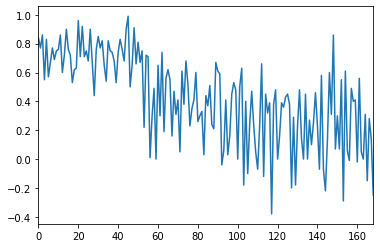

In [77]:
_df[_df.region == 'Albany']['diff'].plot.line()

#### Pattern

- Similar and regular:

> Atlanta, BaltimoreWashington (east), California, LosAngeles, Midsouth, NewOrleansMobile, PhoenixTucson, Portland (northwest), Orlando, 

- Twisted:

> Chicago, Detroit, Louisville (central), MiamiFtLauderdale (south) 

- SanDiego: increasing variance
- Tampa

#### Pattern - diff

- Decreasing: NewYork, Orlando, 
- Uniform: Pittsburgh, Seattle,
- Increasing: SanDiego

In [79]:
_df[_df.region == 'Pittsburgh'].to_csv("Pittsburgh.csv", index=False)
# _df.to_csv("merge.csv", index=False)

In [80]:
_df[_df.region == 'California'].to_csv("California.csv", index=False)

In [2]:
df = pd.read_csv("California.csv")

In [3]:
df.head()

,Date,org,TotalVolOrg,TotalBagsOrg,year,region,Timestamp,conv,TotalVolConv,TotalBagsConv,diff
0,2015-02-01,1.11,196031.90,11697.02,2015,California,1420088520,0.85,9032180.67,600149.24,0.26
1,2015-03-01,1.15,250298.58,12478.15,2015,California,1420088580,0.84,6700134.25,552070.01,0.31
2,2015-11-01,1.60,104331.19,20872.84,2015,California,1420089060,0.95,5830427.96,651915.96,0.65
3,2015-08-02,1.99,89435.60,9234.73,2015,California,1420175280,1.16,5428238.87,566776.08,0.83
4,2015-05-03,1.48,119059.56,13339.71,2015,California,1420261500,0.88,8567534.49,631798.44,0.60


In [ ]:
df.sort_values(by=['Timestamp']).reset_index()